# TFM: algoritmos no supervisados

In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mp

Leemos el catálogo con el que vamos a trabajar

In [2]:
cat = fits.open('ANF40pau_PAUS-COSMOS-radec-narrow-fluxes-err.fits')

In [3]:
#cat.info()

In [4]:
#cat[1].columns

In [5]:
tab = Table(cat[1].data)

In [6]:
#tab

Solo me interesan algunas columnas, convierto la tabla a pandas y filtro.

In [7]:
DF = tab.to_pandas()
#list(DF)

Columnas de interés con sus errores

In [8]:
Tab = DF[['ref_id','ra', 'dec', 'zspec', 'photoz','type', 'u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv','err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']]
#Tab

Una vez filtrada la tabla (**el DataFrame de trabajo bueno es Tab**) con las columnas que queremos

Tengo que añadir algunas columnas de interés, y manipular los datos.

- Columnas de color: con colores. *V-J*, *U-V*, *u-r*, *r-K*.
  **Importante, tenemos los flujos, de manera que los colores van como el cociente de los flujos**, mirar la ecuación de Pogson de más abajo.
  
   
- Normalizar los flujos: con la 'norma' del 'vector filtros' 

- Hemos añadido también colores entre cada par de filtros consecutivos.

In [9]:
# #cociente flujos
# Tab['u/V'] = Tab['u_cfht']/Tab['V_Subaru']
# Tab['V/J'] = Tab['V_Subaru']/Tab['J_uv']
# Tab['u/r'] = Tab['u_cfht']/Tab['r_Subaru']
# Tab['r/K'] = Tab['r_Subaru']/Tab['K_uv']
# Tab['B/r'] = Tab['B_Subaru']/Tab['r_Subaru']
# #colores los plots del paper
# Tab['V-J'] = -2.5*np.log10(Tab['V/J'])
# Tab['u-V'] = -2.5*np.log10(Tab['u/V'])
# Tab['r-K'] = -2.5*np.log10(Tab['r/K'])
# Tab['u-r'] = -2.5*np.log10(Tab['u/r'])
#magnitudes 
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
magerr=['errm_u_cfht', 'errm_B_Subaru', 'errm_V_Subaru', 'errm_r_Subaru', 'errm_i_Subaru', 'errm_suprime_FDCCD_z', 'errm_Y_uv', 'errm_J_uv','errm_H_uv','errm_K_uv']
nerr=['err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']
for i in range(len(filtros)):
    Tab[magnitudes[i]]=-48.6-2.5*np.log10(Tab[filtros[i]])
    Tab[magerr[i]]=Tab[nerr[i]]/Tab[filtros[i]]
#colores con filtros consecutivos
#basta con hacer la resta de las columnas magnitudes consecutivamente
# colores = ['u-B', 'B-V', 'V-r', 'r-i', 'i-z', 'z-Y', 'Y-J', 'J-H', 'H-K'] #9 elementos
# for i in range(len(colores)): #esto itera de 0 a 8 (9elementos)
#     Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_14968\969699413.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[magnitudes[i]]=-48.6-2.5*np.log10(Tab[filtros[i]])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_14968\969699413.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[magerr[i]]=Tab[nerr[i]]/Tab[filtros[i]]
C:\Users\Daniel\AppData\Local\Temp\ipykernel_14968\969699413.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

### Normalizar flujos

In [10]:
#Primero genero cuatro listas con los nombres de las columnas los flujos, sus errores, y los mismos normalizados
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
errfiltros = ['err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']
nerrfiltros = ['nerr_u_cfht', 'nerr_B_Subaru', 'nerr_V_Subaru', 'nerr_r_Subaru', 'nerr_i_Subaru', 'nerr_suprime_FDCCD_z', 'nerr_Y_uv', 'nerr_J_uv','nerr_H_uv','nerr_K_uv']
nfiltros = ['n_u_cfht', 'n_B_Subaru', 'n_V_Subaru', 'n_r_Subaru', 'n_i_Subaru', 'n_suprime_FDCCD_z', 'n_Y_uv', 'n_J_uv','n_H_uv','n_K_uv']

m=Tab[filtros]**2 #Tab[filtros]**2 es un df con las columnas de los filtros al cuadrado, se lo asigno a m
#m.sum(axis=1) devuelve la suma de las columnas de cada fila del df m. De manera que m.sum(axis=1)[0] p.ej. es la suma de
#la primera fila, esto es: el módulo^2 de los filtros de la primera fila.
Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
for i in range(len(filtros)):
    Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
    Tab[nerrfiltros[i]] = Tab[errfiltros[i]]/Tab['módulo_filtros']   
    
#Normalizar errores es algo que hay que pensar 2 veces pero hecho está.
#colist=list(Tab) asigna a la variable colist una lista con los encabezados de las columnas, no me hace falta ahora

C:\Users\Daniel\AppData\Local\Temp\ipykernel_14968\2390807918.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_14968\2390807918.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_14968\2390807918.py:13: SettingWithCopyWarning: 
A value is trying to be 

C:\Users\Daniel\AppData\Local\Temp\ipykernel_14968\2390807918.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[nerrfiltros[i]] = Tab[errfiltros[i]]/Tab['módulo_filtros']


## Componentes principales
calcular las componentes ppales a partir de las magnitudes

después hacer plot de densidad, y plot con las varibles que sean y colores de catálogo.

Después correr otro algoritmo de clasificación

In [11]:
M=Tab[magnitudes]
S=M.to_numpy()
cov_mat = np.cov(S.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
#  Hacemos una lista de parejas (autovector, autovalor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Ordenamos estas parejas den orden descendiente con la funcion sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('varianza explicada:',var_exp)
print('varianza explicada acumulada',cum_var_exp)
#Generamos la matriz a partir de los pares autovalor-autovector
#matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                     # eig_pairs[1][1].reshape(10,1)))
#print('Matriz W:\n', matrix_w)
#'''
#matrix_w = eig_vecs[:2].transpose()
#print('Matriz W:\n', matrix_w)
#'''
#P = S.dot(matrix_w)
P=np.zeros((len(Tab), len(magnitudes)), dtype='double')
for i in range(len(Tab)):  #numero de galaxias
    for j in range(len(magnitudes)):
         P[i,j]=np.inner(eig_vecs[j],S[i]) 

Eigenvectors 
[[-0.25042513 -0.58656227  0.58570805  0.27842443  0.36769375 -0.12794242
   0.04994506  0.0619082  -0.12129563 -0.00708201]
 [-0.29363809 -0.45231432  0.09367751 -0.25893797 -0.64549018  0.39183458
  -0.05796733 -0.18016926  0.16503444  0.01070631]
 [-0.3339251  -0.27434879 -0.37882888 -0.41192759  0.03956286 -0.60468129
  -0.1102301   0.30716578  0.11698905 -0.11242107]
 [-0.3370441  -0.13850295 -0.46910048 -0.13141338  0.46445347  0.36844037
   0.30727017 -0.31784407 -0.22788002  0.17623572]
 [-0.32290725  0.03474076 -0.26760859  0.46085999  0.02011226  0.3147036
  -0.59272158  0.39637195 -0.04927863  0.01472662]
 [-0.32039608  0.13325209 -0.10000467  0.41831505 -0.05446699 -0.30028623
  -0.06587213 -0.63327374  0.31393749 -0.31230088]
 [-0.32055772  0.18123484 -0.00957421  0.28445173 -0.17617289  0.02620027
   0.6773818   0.42203703  0.31793163  0.11673483]
 [-0.32266988  0.24423172  0.12178065  0.03845519 -0.3091369  -0.32314988
  -0.04816244 -0.13560865 -0.55534354 

In [12]:
P.shape

(12113, 10)

In [13]:
Tab.shape

(12113, 67)

Pego las dos primeras componentes al data frame con los datos.

In [14]:
Tab=pd.concat([Tab, pd.DataFrame(P[:,0:2])], axis=1)

In [15]:
#Tab

Hacemos diagrama de densidad con las dos primeras componentes de los autovectores, que explican el 98% de la varianza de los datos.

In [16]:
ppalcomps=[0,1]
Tab[ppalcomps]

,0,1
0,4.398352,-26.853311
1,3.314987,-24.981036
2,5.250365,-27.307578
3,4.647452,-26.163475
4,5.363639,-29.138637
...,...,...
12108,4.624417,-26.599170
12109,4.758619,-27.041005
12110,5.514141,-28.892610
12111,5.736011,-29.215094


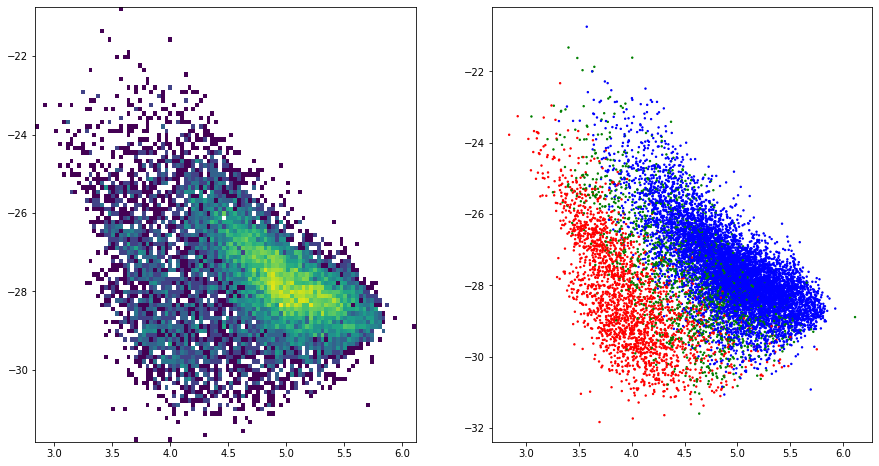

In [17]:
from matplotlib.colors import LogNorm
colors = {0:'red', 1:'green', 2:'blue'}
fig, ax=plt.subplots(1,2, figsize=(15,8))
ax[0].hist2d(P[:,0],P[:,1], bins=100, norm=LogNorm()) #vmax=30);
ax[1].scatter(P[:,0], P[:,1], c=Tab['type'].map(colors), s=2);

Voy a ver cómo afecta el redshift a este gráfico, sobre todo porque luego voy a usar ppal comps para los algoritmos y quizá sea conveniente hacer ventanas de redshift también. Voy a representar hasta z=1.7 porque luego los gráficos están básicamente vacíos.

In [18]:
# #Voy a representar las galaxias entre 0 y el máximo redshift zspec
# z=np.arange(0,1.7,.1)
# colors = {0:'red', 1:'green', 2:'blue'}
# plt.figure(figsize=(40,50))
# plt.suptitle('Componentes ppales por ventanas de redshift', size='xx-large', y=1)
# for j in range(len(z)-1):
#     X=Tab.loc[(Tab['zspec']>z[j])&(Tab['zspec']<z[j+1])]
#     plt.subplot(6, 3, j+1)
#     plt.scatter(X[0], X[1], color=X['type'].map(colors), s=2)
#     plt.xlim([2.5,6.5])
#     plt.ylim([-32.1, -20])
#     plt.xlabel('ppal comp 0')
#     plt.ylabel('ppal comp1') 
#     plt.title('{} < z_spec < {}'.format(round(z[j],1),round(z[j+1],1)))
        
# plt.tight_layout();

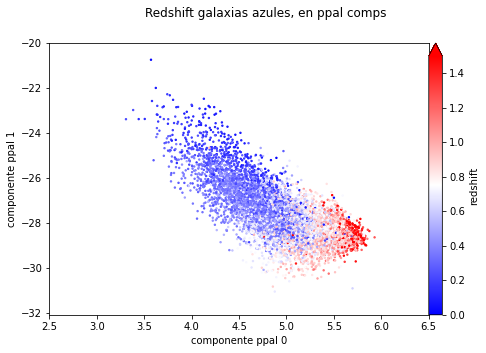

In [19]:
Bluegalaxies=Tab.loc[Tab['type']==2]
plt.figure(figsize=(8,5))
plt.scatter(Bluegalaxies[0], Bluegalaxies[1], c=Bluegalaxies['zspec'], cmap='bwr',s=2)
plt.clim(0,1.5)
plt.xlim([2.5,6.5])
plt.ylim([-32.1, -20])
plt.xlabel('componente ppal 0')
plt.ylabel('componente ppal 1')
plt.colorbar(location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias azules, en ppal comps')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis azules.png');
#Setting axis boundaries we left only one outlier galaxy out of the plot

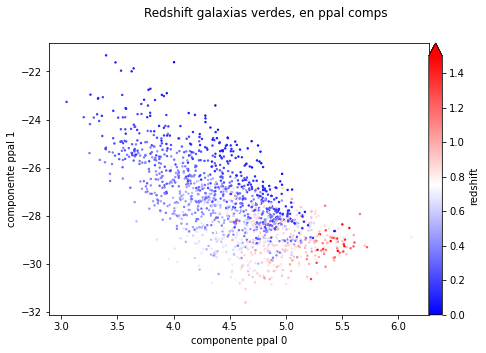

In [20]:
Greengalaxies=Tab.loc[Tab['type']==1]
plt.figure(figsize=(8, 5))
plt.scatter(Greengalaxies[0], Greengalaxies[1], c=Greengalaxies['zspec'], cmap='bwr',s=2)
#ax[1].set_xlim([2.5,6.5])
#ax[1].set_ylim([-32.1, -20])
plt.clim(0,1.5)
plt.colorbar(location='right', pad=0.0001, label='redshift', extend='max')
plt.xlabel('componente ppal 0')
plt.ylabel('componente ppal 1')
plt.suptitle('Redshift galaxias verdes, en ppal comps')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis verdes.png');

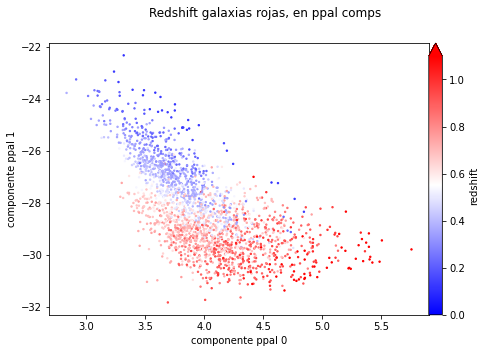

In [21]:
Redgalaxies=Tab.loc[Tab['type']==0]
plt.figure(figsize=(8, 5))
plt.scatter(Redgalaxies[0], Redgalaxies[1], c=Redgalaxies['zspec'], cmap='bwr',s=2)
#ax[1].set_xlim([2.5,6.5])
#ax[1].set_ylim([-32.1, -20])
plt.clim(0,1.1)#Porque las rojas están básicamente entre esos valores por encima de z=1 hay muy pocas galaxias rojas
plt.colorbar(location='right', pad=0.0001, label='redshift', extend='max')
plt.xlabel('componente ppal 0')
plt.ylabel('componente ppal 1')
plt.suptitle('Redshift galaxias rojas, en ppal comps')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis rojas.png');

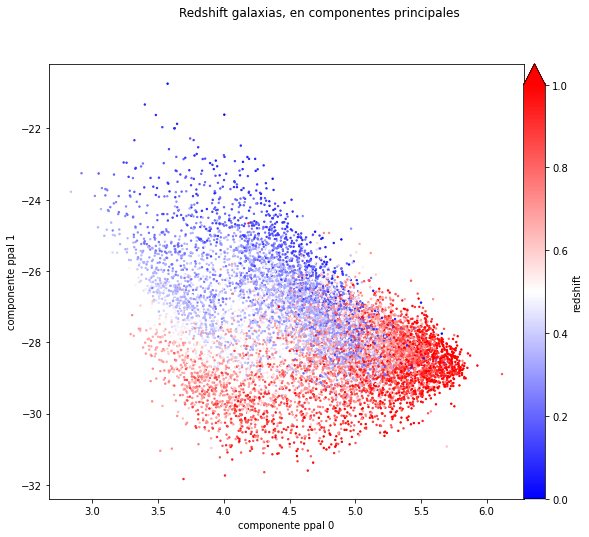

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(Tab[0], Tab[1], c=Tab['zspec'], cmap='bwr',s=2, vmin=0, vmax=1)
#plt.clim(0,1)
#plt.xlim([2.5,6.5])
#plt.ylim([-32.1, -20])
plt.colorbar(location='right', pad=0.0001, label='redshift', extend='max')
plt.xlabel('componente ppal 0')
plt.ylabel('componente ppal 1')
plt.suptitle('Redshift galaxias, en componentes principales')
plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis bueno.png');

Text(0.5, 0.98, 'Redshift galaxias, en ppal comps')

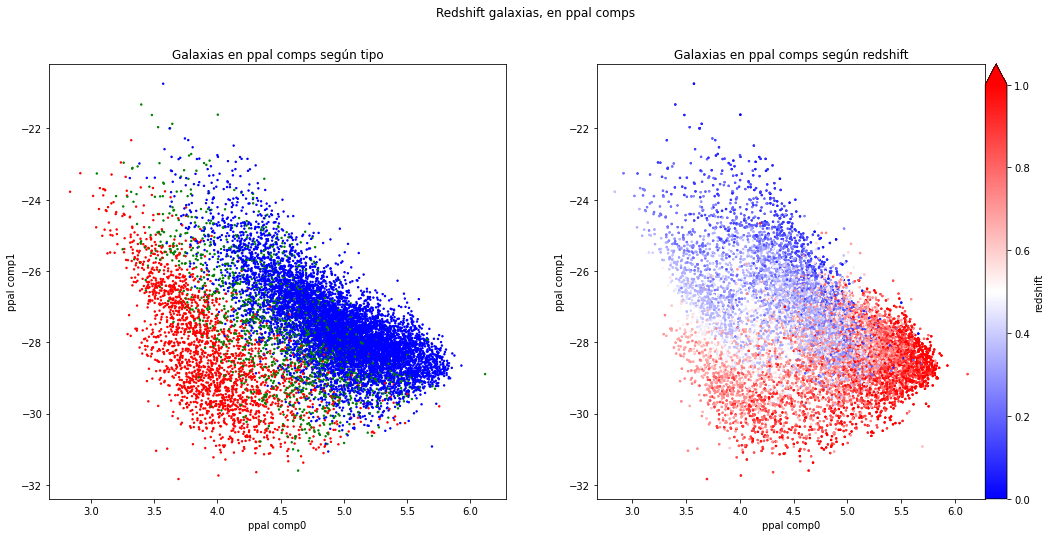

In [23]:
fig, ax=plt.subplots(1,2, figsize=(18,8))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(Tab[0], Tab[1], c=Tab['type'].map(colors), s=2)
ax[0].set_xlabel('ppal comp0')
ax[0].set_ylabel('ppal comp1')
ax[0].set_title('Galaxias en ppal comps según tipo')
ax[1].scatter(Tab[0], Tab[1], c=Tab['zspec'], cmap='bwr' ,s=2, vmin=0, vmax=1)
ax[1].set_xlabel('ppal comp0')
ax[1].set_ylabel('ppal comp1')
ax[1].set_title('Galaxias en ppal comps según redshift')
fig.colorbar(ax[1].scatter(Tab[0], Tab[1], c=Tab['zspec'], cmap='bwr' ,s=2,vmin=0, vmax=1) ,location='right', pad=0.0001, label='redshift', extend='max')
plt.suptitle('Redshift galaxias, en ppal comps')
#plt.savefig('Figuras para Latex/Componentes principales/Redshift analysis vs tipos.png');

En vista de los resultados con los algortimos supervisados probados, y viendo la relación entre los colores (o las ppal comps) y el redshift de los últimos gráficos que hice. Voy a probar a calcular el redshift haciendo regresión con kNN. Probaré con magnitudes y ppal comps como input supongo.

# kNN regresión para calcular redshift

In [24]:
#Separamos nuestros datos para train y test le doy las magnitudes y el redshift.
from sklearn.model_selection import train_test_split
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
ppalcomps=[0,1] #nombres de las columnas con ppal comps
zspec=['zspec'] #redshift 'bueno' espectroscópico
zphot=['photoz'] #redshift con SED fitting para comparar también
tipo=['type'] #tipos de galaxias por si los necesito para algo
mag_z=magnitudes+ppalcomps+tipo+zphot  #lista con los nombres de las columnas con magnitudes, ppal comps, tipo y photoz
X_train, X_test, y_train, y_test = train_test_split(Tab[mag_z].to_numpy(), Tab[zspec].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes, las ppal comps, tipos, photoz

In [25]:
from sklearn.neighbors import KNeighborsRegressor
# reg = KNeighborsRegressor(n_neighbors)
# reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
ks=np.linspace(1,20,20).tolist()
TABLATESTkNN = pd.DataFrame([],columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
for k in ks:
    reg = KNeighborsRegressor(n_neighbors=int(k))
    reg.fit(X_train[:, :-4], y_train)
    y_pred = reg.predict(X_test[:, :-4])
    fila = [round(k,0),len(X_test),round(reg.score(X_train[:, :-4], y_train),2) ,round(reg.score(X_test[:, :-4], y_test),2),
            np.mean(np.abs(y_test-y_pred)), np.mean(np.abs(y_test-X_test[:, -1]))]
            #columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
    TABLATESTkNN.loc[len(TABLATESTkNN.index)] = fila

In [26]:
pruebalista=['a', 1 , 2, 3,4,5,6,7,8,9,'olé']
pruebalista[-4:-2]

[7, 8]

In [27]:
# a=np.array([1,2,3,4])
# b=np.array([4,3,2,1])
# np.mean(np.abs(a-b))

In [28]:
# len(X_test)

In [29]:
TABLATESTkNN

,k,num galax,train score,test score,avg error zspec,avg error photoz
0,1.0,3029.0,1.00,0.85,0.056403,0.329863
1,2.0,3029.0,0.97,0.86,0.052054,0.329863
2,3.0,3029.0,0.96,0.87,0.050752,0.329863
3,4.0,3029.0,0.95,0.87,0.050205,0.329863
4,5.0,3029.0,0.94,0.87,0.050572,0.329863
5,6.0,3029.0,0.94,0.87,0.051100,0.329863
6,7.0,3029.0,0.93,0.86,0.051886,0.329863
7,8.0,3029.0,0.93,0.86,0.052595,0.329863
8,9.0,3029.0,0.93,0.86,0.052985,0.329863
9,10.0,3029.0,0.92,0.86,0.054029,0.329863


In [30]:
todas=TABLATESTkNN.iloc[3]

In [31]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=4)
reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
#Creamos data frame
#mag_z=magnitudes+ppalcomps+tipo+zphot
#y train y test es zspec
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['zspec']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['zspec']=y_test
y_pred = reg.predict(X_test[:, :-4])
TestDF['predz']=y_pred
TestDF['dif ph spec']=np.abs(TestDF['zspec']-TestDF['photoz'])
TestDF['dif pred spec']=np.abs(TestDF['zspec']-TestDF['predz'])
TestDF[['photoz','zspec', 'predz','dif ph spec', 'dif pred spec']]

,photoz,zspec,predz,dif ph spec,dif pred spec
0,0.363,0.3431,0.387175,0.0199,0.044075
1,0.465,0.4728,0.422450,0.0078,0.050350
2,0.760,0.7516,0.807575,0.0084,0.055975
3,0.991,0.9880,0.927127,0.0030,0.060873
4,0.778,0.7755,0.842625,0.0025,0.067125
...,...,...,...,...,...
3024,0.615,0.7299,0.690375,0.1149,0.039525
3025,0.703,0.7040,0.806572,0.0010,0.102572
3026,1.158,1.1569,1.145850,0.0011,0.011050
3027,0.374,0.3725,0.399550,0.0015,0.027050


In [32]:
TestDF[['photoz','zspec', 'predz','dif ph spec', 'dif pred spec']].sort_values(by='dif ph spec', ascending=False).head(30)

,photoz,zspec,predz,dif ph spec,dif pred spec
2017,0.108,2.695700,0.238250,2.587700,2.457450
1297,0.200,2.735550,0.477100,2.535550,2.258450
2526,2.500,0.000000,0.694150,2.500000,0.694150
873,1.378,0.047700,1.094700,1.330300,1.047000
1767,1.550,0.597000,1.030250,0.953000,0.433250
212,0.928,1.464400,0.923575,0.536400,0.540825
611,1.208,0.681800,0.877275,0.526200,0.195475
1032,0.251,0.749500,0.385325,0.498500,0.364175
1564,0.713,0.225000,0.754100,0.488000,0.529100
2435,0.160,0.570700,0.398100,0.410700,0.172600


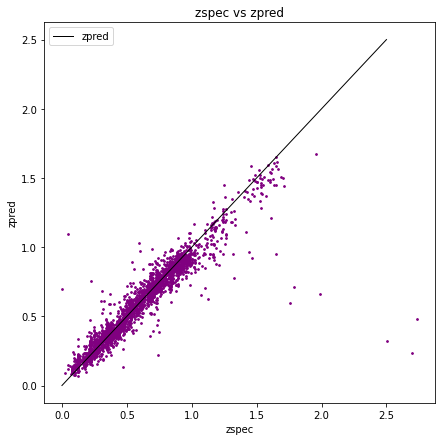

In [33]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
ax.scatter(TestDF['zspec'], TestDF['predz'],s=3, c='purple')
ax.plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black',linewidth=1, label='zpred')
ax.set_title('zspec vs zpred')
ax.legend()
ax.set_xticks([0,0.5,1,1.5,2,2.5])
ax.set_yticks([0,0.5,1,1.5,2,2.5])
ax.set_xlabel('zspec')
ax.set_ylabel('zpred')
plt.savefig('Figuras para Latex/Redshift/todas.png')

# ax[1].scatter(TestDF['zspec'], TestDF['photoz'],s=3)
# ax[1].set_title('zspec vs photoz')
# ax[1].set_xticks([0,0.5,1,1.5,2,2.5])
# ax[1].set_yticks([0,0.5,1,1.5,2,2.5])
# ax[1].set_xlabel('zspec')
# ax[1].set_ylabel('photoz')

## Por tipos solo galaxias rojas
Voy a probar a ajustar los redshifts por tipos, a ver si mejoran los resultados.

In [34]:
Tab.loc[Tab['type']==0][mag_z].shape #Hay 2149 rojas

(2149, 14)

In [35]:
from sklearn.model_selection import train_test_split
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
ppalcomps=[0,1] #nombres de las columnas con ppal comps
zspec=['zspec'] #redshift 'bueno' espectroscópico
zphot=['photoz'] #redshift con SED fitting para comparar también
tipo=['type'] #tipos de galaxias por si los necesito para algo
mag_z=magnitudes+ppalcomps+tipo+zphot  #lista con los nombres de las columnas con magnitudes, ppal comps, tipo y photoz
X_train, X_test, y_train, y_test = train_test_split(Tab.loc[Tab['type']==0][mag_z].to_numpy(), Tab.loc[Tab['type']==0][zspec].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes, las ppal comps, tipos, photozb

In [36]:
from sklearn.neighbors import KNeighborsRegressor
# reg = KNeighborsRegressor(n_neighbors)
# reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
ks=np.linspace(1,20,20).tolist()
TABLATESTkNN = pd.DataFrame([],columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
for k in ks:
    reg = KNeighborsRegressor(n_neighbors=int(k))
    reg.fit(X_train[:, :-4], y_train)
    y_pred = reg.predict(X_test[:, :-4])
    fila = [round(k,0),len(X_test),round(reg.score(X_train[:, :-4], y_train),2) ,round(reg.score(X_test[:, :-4], y_test),2),
            np.mean(np.abs(y_test-y_pred)), np.mean(np.abs(y_test-X_test[:, -1]))]
            #columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
    TABLATESTkNN.loc[len(TABLATESTkNN.index)] = fila

In [37]:
TABLATESTkNN

,k,num galax,train score,test score,avg error zspec,avg error photoz
0,1.0,538.0,1.00,0.89,0.048882,0.263783
1,2.0,538.0,0.96,0.90,0.045352,0.263783
2,3.0,538.0,0.93,0.92,0.042794,0.263783
3,4.0,538.0,0.92,0.92,0.043015,0.263783
4,5.0,538.0,0.91,0.92,0.043331,0.263783
5,6.0,538.0,0.90,0.92,0.044423,0.263783
6,7.0,538.0,0.90,0.92,0.044180,0.263783
7,8.0,538.0,0.89,0.91,0.044616,0.263783
8,9.0,538.0,0.89,0.91,0.045287,0.263783
9,10.0,538.0,0.89,0.91,0.045909,0.263783


In [38]:
rojas=TABLATESTkNN.iloc[2]

In [39]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
#Creamos data frame
#mag_z=magnitudes+ppalcomps+tipo+zphot
#y train y test es zspec
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['zspec']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['zspec']=y_test
y_pred = reg.predict(X_test[:, :-4])
TestDF['predz']=y_pred
TestDF['dif ph spec']=np.abs(TestDF['zspec']-TestDF['photoz'])
TestDF['dif pred spec']=np.abs(TestDF['zspec']-TestDF['predz'])
TestDF[['photoz','zspec', 'predz','dif ph spec', 'dif pred spec']]

,photoz,zspec,predz,dif ph spec,dif pred spec
0,0.692,0.69565,0.723367,0.00365,0.027717
1,0.299,0.30760,0.276200,0.00860,0.031400
2,0.683,0.68440,0.726167,0.00140,0.041767
3,0.974,0.96980,0.912233,0.00420,0.057567
4,0.676,0.67480,0.750100,0.00120,0.075300
...,...,...,...,...,...
533,0.348,0.34700,0.315433,0.00100,0.031567
534,0.381,0.37890,0.374867,0.00210,0.004033
535,0.877,0.90360,0.906067,0.02660,0.002467
536,0.466,0.47270,0.482767,0.00670,0.010067


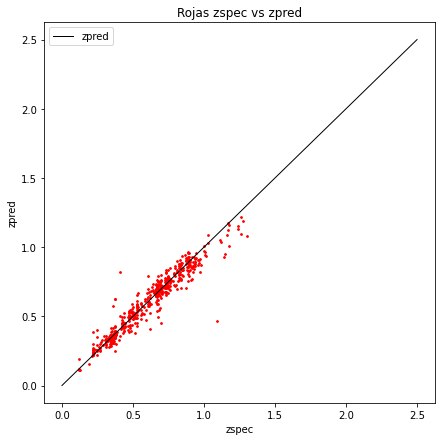

In [40]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
ax.scatter(TestDF['zspec'], TestDF['predz'],s=3, c='red')
ax.plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black',linewidth=1, label='zpred')
ax.set_title('Rojas zspec vs zpred')
ax.set_xticks([0,0.5,1,1.5,2,2.5])
ax.set_yticks([0,0.5,1,1.5,2,2.5])
ax.legend()
ax.set_xlabel('zspec')
ax.set_ylabel('zpred')
plt.savefig('Figuras para Latex/Redshift/rojas.png')

# ax[1].scatter(TestDF['zspec'], TestDF['photoz'],s=3)
# ax[1].plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black', linewidth=1)
# ax[1].set_title('zspec vs photoz')
# ax[1].set_xticks([0,0.5,1,1.5,2,2.5])
# ax[1].set_yticks([0,0.5,1,1.5,2,2.5])
# ax[1].set_xlabel('zspec')
# ax[1].set_ylabel('photoz')

# Galaxias verdes

In [41]:
Tab.loc[Tab['type']==1][mag_z].shape #hay 1537 verdes

(1537, 14)

In [42]:
from sklearn.model_selection import train_test_split
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
ppalcomps=[0,1] #nombres de las columnas con ppal comps
zspec=['zspec'] #redshift 'bueno' espectroscópico
zphot=['photoz'] #redshift con SED fitting para comparar también
tipo=['type'] #tipos de galaxias por si los necesito para algo
mag_z=magnitudes+ppalcomps+tipo+zphot  #lista con los nombres de las columnas con magnitudes, ppal comps, tipo y photoz
X_train, X_test, y_train, y_test = train_test_split(Tab.loc[Tab['type']==1][mag_z].to_numpy(), Tab.loc[Tab['type']==1][zspec].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes, las ppal comps, tipos, photozb

In [43]:
from sklearn.neighbors import KNeighborsRegressor
# reg = KNeighborsRegressor(n_neighbors)
# reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
ks=np.linspace(1,20,20).tolist()
TABLATESTkNN = pd.DataFrame([],columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
for k in ks:
    reg = KNeighborsRegressor(n_neighbors=int(k))
    reg.fit(X_train[:, :-4], y_train)
    y_pred = reg.predict(X_test[:, :-4])
    fila = [round(k,0),len(X_test),round(reg.score(X_train[:, :-4], y_train),2) ,round(reg.score(X_test[:, :-4], y_test),2),
            np.mean(np.abs(y_test-y_pred)), np.mean(np.abs(y_test-X_test[:, -1]))]
            #columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
    TABLATESTkNN.loc[len(TABLATESTkNN.index)] = fila

In [44]:
TABLATESTkNN

,k,num galax,train score,test score,avg error zspec,avg error photoz
0,1.0,385.0,1.00,0.83,0.081208,0.329941
1,2.0,385.0,0.97,0.87,0.070359,0.329941
2,3.0,385.0,0.95,0.87,0.066962,0.329941
3,4.0,385.0,0.94,0.88,0.066299,0.329941
4,5.0,385.0,0.94,0.87,0.066665,0.329941
5,6.0,385.0,0.93,0.87,0.066684,0.329941
6,7.0,385.0,0.92,0.87,0.068961,0.329941
7,8.0,385.0,0.91,0.87,0.069933,0.329941
8,9.0,385.0,0.91,0.87,0.071259,0.329941
9,10.0,385.0,0.90,0.86,0.072397,0.329941


In [45]:
verdes=TABLATESTkNN.iloc[3]

In [46]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=4)
reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
#Creamos data frame
#mag_z=magnitudes+ppalcomps+tipo+zphot
#y train y test es zspec
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['zspec']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['zspec']=y_test
y_pred = reg.predict(X_test[:, :-4])
TestDF['predz']=y_pred
TestDF['dif ph spec']=np.abs(TestDF['zspec']-TestDF['photoz'])
TestDF['dif pred spec']=np.abs(TestDF['zspec']-TestDF['predz'])
TestDF[['photoz','zspec', 'predz','dif ph spec', 'dif pred spec']]

,photoz,zspec,predz,dif ph spec,dif pred spec
0,0.458,0.4682,0.434787,0.0102,0.033413
1,0.283,0.2820,0.235413,0.0010,0.046588
2,0.565,0.5620,0.575750,0.0030,0.013750
3,0.118,0.1264,0.173625,0.0084,0.047225
4,0.200,0.1946,0.337150,0.0054,0.142550
...,...,...,...,...,...
380,0.750,0.6189,0.587675,0.1311,0.031225
381,0.202,0.2120,0.239100,0.0100,0.027100
382,0.780,0.7777,0.732850,0.0023,0.044850
383,0.779,0.7340,0.837500,0.0450,0.103500


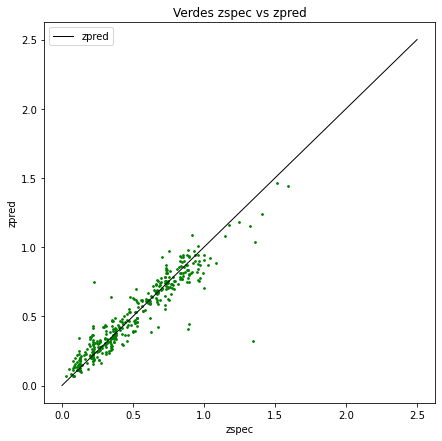

In [47]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
ax.scatter(TestDF['zspec'], TestDF['predz'],s=3, c='green')
ax.plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black',linewidth=1, label='zpred')
ax.set_title('Verdes zspec vs zpred')
ax.set_xticks([0,0.5,1,1.5,2,2.5])
ax.set_yticks([0,0.5,1,1.5,2,2.5])
ax.legend()
ax.set_xlabel('zspec')
ax.set_ylabel('zpred')
plt.savefig('Figuras para Latex/Redshift/verdes.png')

# ax[1].scatter(TestDF['zspec'], TestDF['photoz'],s=3)
# ax[1].plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black', linewidth=1)
# ax[1].set_title('zspec vs photoz')
# ax[1].set_xticks([0,0.5,1,1.5,2,2.5])
# ax[1].set_yticks([0,0.5,1,1.5,2,2.5])
# ax[1].set_xlabel('zspec')
# ax[1].set_ylabel('photoz')

# Galaxias azules

In [48]:
Tab.loc[Tab['type']==2][mag_z].shape #Hay 8427 azules

(8427, 14)

In [49]:
from sklearn.model_selection import train_test_split
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
ppalcomps=[0,1] #nombres de las columnas con ppal comps
zspec=['zspec'] #redshift 'bueno' espectroscópico
zphot=['photoz'] #redshift con SED fitting para comparar también
tipo=['type'] #tipos de galaxias por si los necesito para algo
mag_z=magnitudes+ppalcomps+tipo+zphot  #lista con los nombres de las columnas con magnitudes, ppal comps, tipo y photoz
X_train, X_test, y_train, y_test = train_test_split(Tab.loc[Tab['type']==2][mag_z].to_numpy(), Tab.loc[Tab['type']==2][zspec].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes, las ppal comps, tipos, photozb

In [50]:
from sklearn.neighbors import KNeighborsRegressor
# reg = KNeighborsRegressor(n_neighbors)
# reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
ks=np.linspace(1,20,20).tolist()
TABLATESTkNN = pd.DataFrame([],columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
for k in ks:
    reg = KNeighborsRegressor(n_neighbors=int(k))
    reg.fit(X_train[:, :-4], y_train)
    y_pred = reg.predict(X_test[:, :-4])
    fila = [round(k,0),len(X_test),round(reg.score(X_train[:, :-4], y_train),2) ,round(reg.score(X_test[:, :-4], y_test),2),
            np.mean(np.abs(y_test-y_pred)), np.mean(np.abs(y_test-X_test[:, -1]))]
            #columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
    TABLATESTkNN.loc[len(TABLATESTkNN.index)] = fila

In [51]:
TABLATESTkNN

,k,num galax,train score,test score,avg error zspec,avg error photoz
0,1.0,2107.0,1.00,0.89,0.053087,0.325773
1,2.0,2107.0,0.97,0.89,0.050158,0.325773
2,3.0,2107.0,0.95,0.90,0.048980,0.325773
3,4.0,2107.0,0.94,0.91,0.048322,0.325773
4,5.0,2107.0,0.94,0.91,0.048884,0.325773
5,6.0,2107.0,0.93,0.90,0.049797,0.325773
6,7.0,2107.0,0.93,0.90,0.050282,0.325773
7,8.0,2107.0,0.92,0.90,0.050716,0.325773
8,9.0,2107.0,0.92,0.90,0.051470,0.325773
9,10.0,2107.0,0.92,0.89,0.052307,0.325773


In [52]:
azules=TABLATESTkNN.iloc[3]

In [53]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=4)
reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
#Creamos data frame
#mag_z=magnitudes+ppalcomps+tipo+zphot
#y train y test es zspec
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['zspec']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['zspec']=y_test
y_pred = reg.predict(X_test[:, :-4])
TestDF['predz']=y_pred
TestDF['dif ph spec']=np.abs(TestDF['zspec']-TestDF['photoz'])
TestDF['dif pred spec']=np.abs(TestDF['zspec']-TestDF['predz'])
TestDF[['photoz','zspec', 'predz','dif ph spec', 'dif pred spec']]

,photoz,zspec,predz,dif ph spec,dif pred spec
0,0.372,0.3705,0.348975,0.0015,0.021525
1,0.428,0.4211,0.391950,0.0069,0.029150
2,0.203,0.2017,0.216750,0.0013,0.015050
3,0.481,0.4786,0.457925,0.0024,0.020675
4,0.442,0.4429,0.321550,0.0009,0.121350
...,...,...,...,...,...
2102,1.200,1.1680,1.169750,0.0320,0.001750
2103,0.808,0.8100,0.766212,0.0020,0.043788
2104,0.899,0.8913,0.836525,0.0077,0.054775
2105,0.338,0.3398,0.335875,0.0018,0.003925


In [54]:
8427*0.3

2528.1

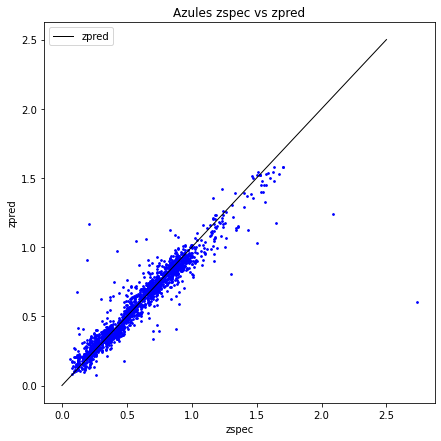

In [55]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
ax.scatter(TestDF['zspec'], TestDF['predz'],s=3, c='blue')
ax.plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black',linewidth=1, label='zpred')
ax.set_title('Azules zspec vs zpred')
ax.set_xticks([0,0.5,1,1.5,2,2.5])
ax.set_yticks([0,0.5,1,1.5,2,2.5])
ax.legend()
ax.set_xlabel('zspec')
ax.set_ylabel('zpred')
plt.savefig('Figuras para Latex/Redshift/azules.png')

# ax[1].scatter(TestDF['zspec'], TestDF['photoz'],s=3)
# ax[1].plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black', linewidth=1)
# ax[1].set_title('zspec vs photoz')
# ax[1].set_xticks([0,0.5,1,1.5,2,2.5])
# ax[1].set_yticks([0,0.5,1,1.5,2,2.5])
# ax[1].set_xlabel('zspec')
# ax[1].set_ylabel('photoz')

## Tabla resumen de resultados

In [68]:
len(todas.values)

6

In [81]:
filatodas=['todas']
for i in range(0, len(todas.values)):
             filatodas.append(todas.values[i])
filatodas

['todas', 4.0, 3029.0, 0.95, 0.87, 0.05020485995840321, 0.32986332276000396]

In [82]:
filarojas=['rojas']
for i in range(0, len(rojas.values)):
             filarojas.append(rojas.values[i])
        
filaverdes=['verdes']
for i in range(0, len(verdes.values)):
    filaverdes.append(verdes.values[i])

filazules=['azules']
for i in range(0, len(azules.values)):
    filazules.append(azules.values[i])

In [84]:
TABLAres = pd.DataFrame([],columns=['galaxias','k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
TABLAres.loc[len(TABLAres.index)] = filatodas
TABLAres.loc[len(TABLAres.index)] = filarojas
TABLAres.loc[len(TABLAres.index)] = filaverdes
TABLAres.loc[len(TABLAres.index)] = filazules
TABLAres
TABLAres.to_csv('Tablas para Latex/kNNredshift.csv');

In [85]:
TABLAres

,galaxias,k,num galax,train score,test score,avg error zspec,avg error photoz
0,todas,4.0,3029.0,0.95,0.87,0.050205,0.329863
1,rojas,3.0,538.0,0.93,0.92,0.042794,0.263783
2,verdes,4.0,385.0,0.94,0.88,0.066299,0.329941
3,azules,4.0,2107.0,0.94,0.91,0.048322,0.325773


## Con componentes ppales

In [39]:
from sklearn.model_selection import train_test_split
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
ppalcomps=[0,1] #nombres de las columnas con ppal comps
zspec=['zspec'] #redshift 'bueno' espectroscópico
zphot=['photoz'] #redshift con SED fitting para comparar también
tipo=['type'] #tipos de galaxias por si los necesito para algo
mag_z=magnitudes+ppalcomps+tipo+zphot  #lista con los nombres de las columnas con magnitudes, ppal comps, tipo y photoz
X_train, X_test, y_train, y_test = train_test_split(Tab.loc[Tab['type']==0][mag_z].to_numpy(), Tab.loc[Tab['type']==0][zspec].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes, las ppal comps, tipos, photozb

In [40]:
from sklearn.neighbors import KNeighborsRegressor
# reg = KNeighborsRegressor(n_neighbors)
# reg.fit(X_train[:, -4:-2], y_train)#ahora con ppal comps
ks=np.linspace(1,20,20).tolist()
TABLATESTkNN = pd.DataFrame([],columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
for k in ks:
    reg = KNeighborsRegressor(n_neighbors=int(k))
    reg.fit(X_train[:, -4:-2], y_train)
    y_pred = reg.predict(X_test[:, -4:-2])
    fila = [round(k,0),len(X_test),round(reg.score(X_train[:, -4:-2], y_train),2) ,round(reg.score(X_test[:, -4:-2], y_test),2),
            np.mean(np.abs(y_test-y_pred)), np.mean(np.abs(y_test-X_test[:, -1]))]
            #columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
    TABLATESTkNN.loc[len(TABLATESTkNN.index)] = fila

In [41]:
TABLATESTkNN

,k,num galax,train score,test score,avg error zspec,avg error photoz
0,1.0,538.0,1.00,0.58,0.113912,0.263783
1,2.0,538.0,0.87,0.66,0.104973,0.263783
2,3.0,538.0,0.82,0.69,0.098973,0.263783
3,4.0,538.0,0.78,0.72,0.091766,0.263783
4,5.0,538.0,0.77,0.73,0.092356,0.263783
5,6.0,538.0,0.76,0.73,0.091664,0.263783
6,7.0,538.0,0.75,0.74,0.091422,0.263783
7,8.0,538.0,0.74,0.73,0.091865,0.263783
8,9.0,538.0,0.74,0.74,0.090330,0.263783
9,10.0,538.0,0.74,0.74,0.089849,0.263783


In [42]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train[:, -4:-2], y_train)#solo ajustamos con magnitudes
#Creamos data frame
#mag_z=magnitudes+ppalcomps+tipo+zphot
#y train y test es zspec
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['zspec']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['zspec']=y_test
y_pred = reg.predict(X_test[:, -4:-2])
TestDF['predz']=y_pred
TestDF['dif ph spec']=np.abs(TestDF['zspec']-TestDF['photoz'])
TestDF['dif pred spec']=np.abs(TestDF['zspec']-TestDF['predz'])
TestDF[['photoz','zspec', 'predz','dif ph spec', 'dif pred spec']]

,photoz,zspec,predz,dif ph spec,dif pred spec
0,0.692,0.69565,0.661222,0.00365,0.034428
1,0.299,0.30760,0.274867,0.00860,0.032733
2,0.683,0.68440,0.798367,0.00140,0.113967
3,0.974,0.96980,0.780933,0.00420,0.188867
4,0.676,0.67480,0.905067,0.00120,0.230267
...,...,...,...,...,...
533,0.348,0.34700,0.247967,0.00100,0.099033
534,0.381,0.37890,0.377467,0.00210,0.001433
535,0.877,0.90360,0.842667,0.02660,0.060933
536,0.466,0.47270,0.632200,0.00670,0.159500


Text(0, 0.5, 'photoz')

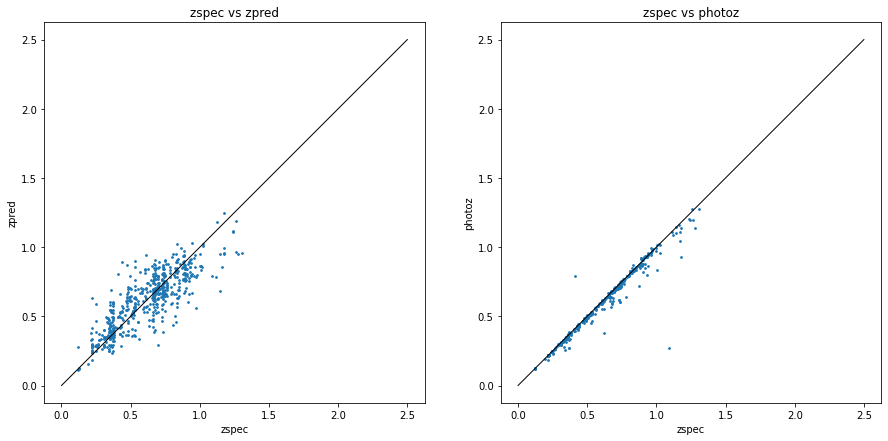

In [43]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
ax[0].scatter(TestDF['zspec'], TestDF['predz'],s=3)
ax[0].plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black',linewidth=1)
ax[0].set_title('zspec vs zpred')
ax[0].set_xticks([0,0.5,1,1.5,2,2.5])
ax[0].set_yticks([0,0.5,1,1.5,2,2.5])
ax[0].set_xlabel('zspec')
ax[0].set_ylabel('zpred')

ax[1].scatter(TestDF['zspec'], TestDF['photoz'],s=3)
ax[1].plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black', linewidth=1)
ax[1].set_title('zspec vs photoz')
ax[1].set_xticks([0,0.5,1,1.5,2,2.5])
ax[1].set_yticks([0,0.5,1,1.5,2,2.5])
ax[1].set_xlabel('zspec')
ax[1].set_ylabel('photoz')

In [44]:
#Separamos nuestros datos para train y test le doy las magnitudes y el redshift.
from sklearn.model_selection import train_test_split
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
ppalcomps=[0,1] #nombres de las columnas con ppal comps
zspec=['zspec'] #redshift 'bueno' espectroscópico
zphot=['photoz'] #redshift con SED fitting para comparar también
tipo=['type'] #tipos de galaxias por si los necesito para algo
# magerr=['errm_u_cfht', 'errm_B_Subaru', 'errm_V_Subaru', 'errm_r_Subaru', 'errm_i_Subaru', 'errm_suprime_FDCCD_z', 'errm_Y_uv', 'errm_J_uv','errm_H_uv','errm_K_uv']
# nerr=['err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']

mag_z=magnitudes+magerr+ppalcomps+tipo+zphot  #lista con los nombres de las columnas con magnitudes, ppal comps, tipo y photoz
X_train, X_test, y_train, y_test = train_test_split(Tab[mag_z].to_numpy(), Tab[zspec].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes, las ppal comps, tipos, photoz

In [45]:
import dnf
#PHOTOZ CALL
zbins=np.arange(0,2.0,0.1)
algorithm='ANF'
z_photo,zerr_e,photozerr_param,photozerr_fit,Vpdf,z1,nneighbors,de1,d1,id1,C=dnf.dnf(X_train[:,0:10],y_train,X_test[:,0:10],X_test[:, 10:20],zbins,pdf=False,Nneighbors=80,bound=False,radius=2,magflux='mag',metric=algorithm,coeff=True) 


NEighbors[ztrue] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\Daniel\Documents\UNIVERSIDAD\MÁSTER\TFM\dnf.py:260: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  X=np.linalg.lstsq(A,B)


ValueError: setting an array element with a sequence.

In [46]:
prueba=np.array([[1],[2],[3]])
np.shape(prueba)

(3, 1)

In [ ]:
prueba

In [ ]:
np.reshape(prueba, (1, 3))

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
ax[0].scatter(y_test, z_photo,s=3)
ax[0].plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black',linewidth=1)
ax[0].set_title('zspec vs zpred')
ax[0].set_xticks([0,0.5,1,1.5,2,2.5])
ax[0].set_yticks([0,0.5,1,1.5,2,2.5])
ax[0].set_xlabel('zspec')
ax[0].set_ylabel('zpred')

ax[1].scatter(TestDF['zspec'], TestDF['photoz'],s=3)
ax[1].plot(np.linspace(0,2.5,100), np.linspace(0,2.5,100), c='black', linewidth=1)
ax[1].set_title('zspec vs photoz')
ax[1].set_xticks([0,0.5,1,1.5,2,2.5])
ax[1].set_yticks([0,0.5,1,1.5,2,2.5])
ax[1].set_xlabel('zspec')
ax[1].set_ylabel('photoz')